# Text Cleaning

#### Dataset link: https://github.com/skathirmani/datasets

In [1]:
import pandas as pd
import nltk

In [2]:
url = 'https://github.com/skathirmani/datasets/raw/master/narendramodi_tweets.csv'
tweets = pd.read_csv(url)

In [8]:
tweets.head(1)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [4]:
tweets.to_csv('tweets.csv', index=False)

In [9]:
tweets.shape

(3220, 14)

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 14 columns):
id                      3220 non-null float64
retweets_count          3220 non-null float64
favorite_count          3220 non-null float64
created_at              3220 non-null object
text                    3220 non-null object
lang                    3220 non-null object
retweeted               3220 non-null bool
followers_count         3220 non-null float64
friends_count           3220 non-null float64
hashtags_count          3220 non-null float64
description             3220 non-null object
location                3220 non-null object
background_image_url    3220 non-null object
source                  3220 non-null object
dtypes: bool(1), float64(6), object(7)
memory usage: 330.3+ KB


![modiwordcloud](modi_wordcloud.PNG)

In [11]:
tweets['text'].head()

0    The President's address wonderfully encapsulat...
1    Rashtrapati Ji's address to both Houses of Par...
2    RT @PMOIndia: Empowering the marginalised. htt...
3    RT @PMOIndia: Commitment to welfare of farmers...
4    RT @PMOIndia: Improving the quality of life fo...
Name: text, dtype: object

## Convert Lower

In [40]:
docs = tweets['text']
docs = docs.str.lower()

### Regular expression

In [19]:
docs[0].replace('the', '--')

"-- president's address wonderfully encapsulated india's strengths, aspirations, potential &amp; -- efforts towards #transformingindia."

In [20]:
docs[0].replace('the', '')

" president's address wonderfully encapsulated india's strengths, aspirations, potential &amp;  efforts towards #transformingindia."

In [24]:
docs.str.replace('[a-z]', '').head()

0           '    ' , ,  &;    #.
1     '        - &; .  . ://./ @
2                 @:   . ://./94
3                @:     . ://./7
4          @:        . ://./8252
Name: text, dtype: object

In [25]:
docs.str.replace('[0-9]', '').head()

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

In [27]:
docs.str.replace('[^a-z ]', '').head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt pmoindia empowering the marginalised httpst...
3    rt pmoindia commitment to welfare of farmers h...
4    rt pmoindia improving the quality of life for ...
Name: text, dtype: object

In [28]:
docs.str.replace('[^a-z0-9 ]', '').head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt pmoindia empowering the marginalised httpst...
3    rt pmoindia commitment to welfare of farmers h...
4    rt pmoindia improving the quality of life for ...
Name: text, dtype: object

In [41]:
docs = docs.str.replace('[^a-z#@ ]', '')
docs.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [42]:
docs = docs.str.split(' ')

In [43]:
words_rows = docs.tolist()

In [44]:
len(words_rows)

3220

In [45]:
words_all = []
for row in words_rows:
    words_all.extend(row)
len(words_all)

56862

In [52]:
#words_all[:30]

In [53]:
words_all = pd.Series(words_all)
words_all.head()

0             the
1      presidents
2         address
3     wonderfully
4    encapsulated
dtype: object

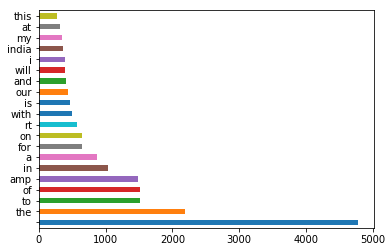

In [58]:
%matplotlib inline
words_all.value_counts().head(20).plot.barh()

In [73]:
import numpy as np
common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['', 'amp', 'rt']
stop_words_all = np.hstack([common_stop_words, custom_stop_words])
len(stop_words_all)

182

In [78]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('playing')

'play'

In [103]:
docs = tweets['text']
docs = docs.str.lower()
docs = docs.str.replace('[^a-z#@ ]', '')
docs = docs.str.split(' ')
words_rows = docs.tolist()
words_all = []
words_rows_clean = []
docs_clean = []
for row in words_rows:
    row_words = [stemmer.stem(word) for word in row if word not in stop_words_all]  
    words_rows_clean.append(row_words)
    docs_clean.append(' '.join(row_words))
    words_all.extend(row_words)
words_all = pd.Series(words_all)
#words_all.value_counts().head(20).plot.barh()

In [104]:
len(words_all)

32422

In [106]:
#words_rows_clean[:2]
docs_clean[:2]

['presid address wonder encapsul india strength aspir potenti effort toward #transformingindia',
 'rashtrapati ji address hous parliament indepth extens hear httpstcordkqtjgnnx @rashtrapatibhvn']

In [66]:
#nltk.download('stopwords')

In [108]:
print(len(words_all))
print(len(words_rows_clean))
print(len(docs_clean))

32422
3220
3220
